# 1)Window Aggregate Functions

In this lesson, we'll discuss window aggregate functions. Generally, when we write aggregate queries, the **columns not included** in the `GROUP BY` clause do **not appear in the result set**, and we lose the details. 

The `OVER` clause allows us to add aggregate functions to non-aggregate and even aggregate queries and eliminate the mentioned restriction. Thus, a window aggregate function doesn’t require a `GROUP BY` clause. So we can implement more insightful queries without dealing with the limits of the `GROUP BY` clause.

After you finish this lesson, you'll have a good understanding of the following:

1. What window aggregate functions are

1. How to add window aggregate functions to **non-aggregate queries**

1. How to add window aggregate functions to **aggregate queries**

# 2) What Are Window Aggregate Functions?

Window aggregate functions are the same functions as grouped aggregate functions. One of the differences is how we apply these two classes of functions to a set of rows. When you use an aggregate function with a `GROUP BY` clause, you can compute one result from the group of rows in the result set. However, the window aggregate functions are calculated over a range of rows defined by an `OVER()` clause.

Another difference lies in the output: while grouping gives us results per group, with `OVER()`, we get results for each row.

Let's discover the difference between them with an example.

Consider the following table:

| sales_date | brand   | model                    | quantity |
|------------|---------|--------------------------|----------|
| 2022-01-31 | Samsung | Samsung Galaxy Z Fold4   | 40       |
| 2022-01-31 | Samsung | Samsung Galaxy S22 Ultra | 30       |
| 2022-02-28 | Samsung | Samsung Galaxy S22 Ultra | 35       |
| 2022-03-31 | Samsung | Samsung Galaxy S22 Ultra | 25       |
| 2022-03-31 | Samsung | Samsung Galaxy Z Fold4   | 60       |
| 2022-04-30 | Samsung | Samsung Galaxy Z Fold4   | 25       |
| 2022-05-31 | Samsung | Samsung Galaxy Z Fold4   | 30       |
| 2022-05-31 | Samsung | Samsung Galaxy S22 Ultra | 47       |
| 2022-06-30 | Samsung | Samsung Galaxy Z Fold4   | 76       |

We want to know the total and average quantities of phones sold each month. Let's look at the result of the query below:

```sql
SELECT sales_date, SUM(quantity), AVG(quantity)
  FROM phone_sales_quantity
 GROUP BY sales_date;
```
| sales_date | sum | avg  |
|------------|-----|------|
| 2022-04-30 | 25  | 25   |
| 2022-02-28 | 35  | 35   |
| 2022-06-30 | 76  | 76   |
| 2022-05-31 | 77  | 38.5 |
| 2022-03-31 | 85  | 42.5 |
| 2022-01-31 | 70  | 35   |

As you've seen, with simple aggregates, the only columns allowed in the `SELECT` clause are the aggregate and those columns included in a GROUP BY clause, which means you no longer have access to each sale's quantity contributing to the results. So, if we add the quantity column in the `SELECT` clause, the DBMS yields an error message. 

To handle the issue, you can use window functions to retrieve the underlying data along with the aggregates.



As we learned, the keyword for window functions is the `OVER()` clause. Here is a query that uses an `OVER` clause to fix the previous query's issue.

```sql
SELECT sales_date, brand, model, quantity,
       SUM(quantity) OVER(PARTITION BY sales_date),
       AVG(quantity) OVER(PARTITION BY sales_date)
  FROM phone_sales_quantity;
```

Unlike the query with the `GROUP BY` clause, in the preceding query, we can include additional columns in the `SELECT` clause.

The query above includes four columns of detailed data about each sale and two aggregates. The only difference between these two queries is that we used the `OVER()` clause instead of the GROUP BY clause in the preceding query.

Therefore, the sum and average quantities of phones sold each month returned with detailed data as follows.

| sales_date | brand   | model                    | quantity | sum | avg  |
|------------|---------|--------------------------|----------|-----|------|
| 2022-01-31 | Samsung | Samsung Galaxy Z Fold4   | 40       | 70  | 35   |
| 2022-01-31 | Samsung | Samsung Galaxy S22 Ultra | 30       | 70  | 35   |
| 2022-02-28 | Samsung | Samsung Galaxy S22 Ultra | 35       | 35  | 35   |
| 2022-03-31 | Samsung | Samsung Galaxy S22 Ultra | 25       | 85  | 42.5 |
| 2022-03-31 | Samsung | Samsung Galaxy Z Fold4   | 60       | 85  | 42.5 |
| 2022-04-30 | Samsung | Samsung Galaxy Z Fold4   | 25       | 25  | 25   |
| 2022-05-31 | Samsung | Samsung Galaxy Z Fold4   | 30       | 77  | 38.5 |
| 2022-05-31 | Samsung | Samsung Galaxy S22 Ultra | 47       | 77  | 38.5 |
| 2022-06-30 | Samsung | Samsung Galaxy Z Fold4   | 76       | 76  | 76   |

Although having the aggregates returned for every row doesn't make sense, it allows us to write more valuable queries, like comparing aggregates with detail values, which is only simple with window functions.

## Instructions

Write a query comparing the number of phones sold in each row with the average monthly sales quantity.

1.Run a query against the `phone_sales_quantity` table returning:

* All original columns in the table

* The average daily sales quantity, aliased as `average`

* The difference between the quantity of sold phones and the average daily sales quantity, aliased as `difference`

In [ ]:
%%sql
SELECT *,
       AVG(quantity) OVER(PARTITION BY sales_date) AS average,
       quantity - AVG(quantity) OVER(PARTITION BY sales_date) AS difference
FROM phone_sales_quantity


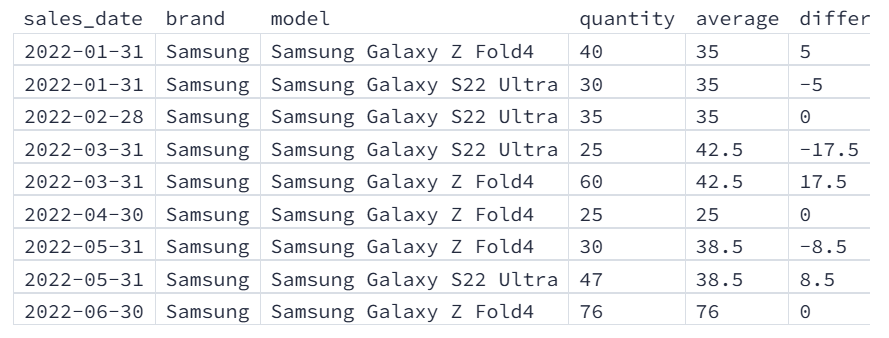

# 3) Using Window Aggregate Functions

Based on standard SQL, window aggregate functions support three main elements:

* Partitioning

* Ordering

* Framing

Here's the general syntax:

```sql
aggregate_function(column_name) OVER(
        [PARTITION BY clause],
        [ORDER BY clause],
        [window framing clause]
        )
```

Although we're already familiar with the window functions syntax and its elements, let's first review the three main elements with a focus on their usage in window aggregate functions before we introduce some helpful window aggregate functions.

* The window **partitioning** element allows us to restrict the window to only those rows with the **same value in the partitioning columns as the current row**.

* The **ordering** element in the window specification is not supported for window aggregate functions and gives meaning to the framing element.

The **framing** element enables us to specify further **which rows are included in an aggregate**. So we can dive into the data section that we're interested in.

The List of Window Aggregate Functions

| Window Aggregate Function | Definition                                                                                       |
|---------------------------|--------------------------------------------------------------------------------------------------|
| SUM(expression)           | Returns the sum of the rows from expression as viewed by the OVER clause.                        |
| AVG(expression)           | Returns the average of expression as viewed by the OVER clause.                                  |
| MIN(expression)           | Finds the minimum value in a column given by expression as viewed by the OVER clause.            |
| MAX(expression)           | Returns the highest value in a column given by expression as viewed by the OVER clause.          |
| COUNT(expression)         | Returns a count of the number of non-NULL values of the expression as viewed by the OVER clause. |
| VARIANCE(expression)      | Returns the variance of all expression values as viewed by the OVER clause.                      |
| STDDEV(expression)        | Returns a sample standard deviation of all expression values as viewed by the OVER clause.       |

Let's assume we're interested in each department's highest and lowest salaries. To write a query that returns the mentioned information, we require a `PARTITION BY` clause, as follows:

```sql
SELECT last_name, department, salary,
       MAX(salary) OVER(PARTITION BY department) as max_salary,
       MIN(salary) OVER(PARTITION BY department) as min_salary
  FROM employees;
```

| last_name | department | salary    | max_salary | min_salary |
|-----------|------------|-----------|------------|------------|
| Mitchell  | IT         | 89900.00  | 89900      | 67800      |
| Edward    | IT         | 75900.00  | 89900      | 67800      |
| Callahan  | IT         | 78000.00  | 89900      | 67800      |
| King      | IT         | 67800.00  | 89900      | 67800      |
| Adams     | Management | 108000.00 | 108000     | 108000     |
| Johnson   | Sales      | 76500.00  | 98900      | 69800      |
| Park      | Sales      | 69800.00  | 98900      | 69800      |
| Peacock   | Sales      | 87000.00  | 98900      | 69800      |
| Edwards   | Sales      | 98900.00  | 98900      | 69800      |


## Instructions

A table called `phone_sales_by_month` contains sales data for two different phone brands. You want to analyze the **revenue generated by each brand** and view it in different ways to identify trends more accurately.

Write a query that returns the following:

* All original columns in the table

* The running average sales revenue for each phone brand separately, aliased as `running_average`

* The rolling three-month average sales revenue for each phone brand separately (use the previous two months and the current month), aliased as three_month_average

Note that revenue is calculated by multiplying `quantity` by `unit_price`.


# 4) Window Functions and The WHERE Clause

We're able to add a `WHERE` clause to any query for filtering the result, as follows:

```sql
SELECT first_name, last_name, department, salary,
       AVG(salary) OVER() as average_salary
  FROM employees
 WHERE department = 'Sales';
 ```

 | first_name | last_name | department | salary   | average_salary |
|------------|-----------|------------|----------|----------------|
| Nancy      | Edwards   | Sales      | 98900.00 | 83050          |
| Jane       | Peacock   | Sales      | 87000.00 | 83050          |
| Margaret   | Park      | Sales      | 69800.00 | 83050          |
| Steve      | Johnson   | Sales      | 76500.00 | 83050          |


As shown above, we calculated the salaries only for the sales department since the `AVG()` function is only applied to the rows returned by the query.

That's precisely the rule we need to remember. **Window functions** are always e**xecuted after the WHERE clause**, so they're applied to whatever the result set contains.

Although we can run the above query, we cannot put window functions in a `WHERE` clause. Let's look at the following query that tries to return those employees whose salaries are higher than the average salary.

```sql
SELECT first_name, last_name, department, salary,
       AVG(salary) OVER() as average_salary
  FROM employees
 WHERE salary > AVG(salary) OVER();
 ```

 > Running the above query yields the error message

 We got the above error message because if we put window functions in a WHERE clause, we get into a circular dependency trap.

To solve this problem, we can employ a subquery.

## Instructions

1. Write a query against the employees table that finds `first_name`, `last_name`, and `salary` for those employees whose s**alaries are above the average**.

* Create a subquery that returns every employee's first name, last name, and salary, along with the company's average salary. Use it in the `FROM` clause

* Query the result set returned by the subquery and select the `first_name`, `last_name`, and `salary` columns, then filter out only those employees whose salaries are above the average.

In [ ]:
%%sql
SELECT first_name, last_name, salary, average_salary
FROM (SELECT first_name, last_name, salary, AVG(salary) OVER() as average_salary
      FROM employees) AS subquery
WHERE salary > average_salary
               

# 5)  Window Functions and the Order of Execution

Let's discover the query processing order since it is one of the most fundamental aspects of SQL that every SQL developer needs to learn, especially when dealing with window functions.

Always keep in mind the following order:

1. **FROM and JOIN**: The FROM clause constructs the data set for the query. Multiple data sources can be joined using the JOIN clause if necessary.

1. **WHERE**: The conditions defined in the WHERE clause determine which rows are included in the data set.

1. **GROUP BY**: The GROUP BY clause groups the data set's rows based on the grouping expression.

1. **HAVING**: The HAVING clause filters aggregate results.

1. **SELECT**: The SELECT clause determines those columns appearing in the result set.

    * **This is where we've been using window functions**.

1. **ORDER BY**: The ORDER BY clause sorts the result set based on one or multiple columns.

1. **OFFSET**: The OFFSET clause determines where to start returning data.

1. **LIMIT**: The LIMIT clause limits the number of rows returned by a SELECT statement.

Although we can put aggregate functions in a `HAVING` clause, given the above, it's impossible to put window aggregate functions in the WHERE, `GROUP BY`, and `HAVING` clauses because while these clauses are being processed, we haven't gotten to `SELECT` yet. Thus the results of the window functions still aren't ready for consumption.

## Instructions

1. Write a query against the employees table that returns the `first_name`, `last_name`, `department`, and `salary` columns along with the average salary of the department they are associated with, aliased as `dep_avg_salary`.

Sort the result set based on the department's average salary in descending order.


In [ ]:
%%sql
SELECT first_name,last_name, department, salary,
       AVG(salary) OVER(PARTITION BY department) AS dep_avg_salary
FROM employees
ORDER BY dep_avg_salary DESC

# 6) Combining Window Aggregate Functions with Aggregate Queries

Combining window aggregates with aggregate queries is more complex than it seems. Let's look deeper into it.

Let's assume we're asked to report the total salary for each department and company's total salary based on the data in the employees table.

To respond to the question, we can try the following query:

```sql
SELECT department, SUM(salary) AS total_depatment_salary,
       SUM(salary) OVER() AS total_company_salary
  FROM employees
 GROUP BY department;

 it shows the error:

 ERROR: column "employees.salary" must appear in the GROUP BY clause or be used in an aggregate function
```

To solve the issue above, we should keep in mind these two rules:

1. The result of the `FROM`, `WHERE`, `GROUP BY`, and `HAVING` clauses determines the rows and columns in the base window and the granularity.

1. Any expression used anywhere in the window function must be in the `GROUP BY` clause or aggregated inside the window function.

Based on the mentioned rules, the rows in the window are created after the `GROUP BY` operation; therefore, the window contains any expression listed in the `GROUP BY` clause plus any aggregate expression. Any expression in any part of window functions must follow the same rules as the `SELECT` list.

The above explanation means that since the department column is part of the `GROUP BY` clause, we can use the column as the argument of any window functions or as a `PARTITION BY` column. Also, to use the salary column in any window functions, it must be aggregated first.

Now, let's see the solution.

```sql
SELECT department, SUM(salary) as total_depatment_salary,
       SUM(SUM(salary)) OVER() as total_company_salary
FROM employees
GROUP BY department;
```

| department | total_depatment_salary | total_company_salary |
|------------|------------------------|----------------------|
| Management | 108000                 | 751800               |
| Sales      | 332200                 | 751800               |
| IT         | 311600                 | 751800               |


Although we cannot use nested aggregate functions in SQL, as mentioned earlier, the **window function must be applied to the SUM of salary**, not just salary.

## Instructions

1. Write a query against the `phone_sales_by_month` table that returns:

* month (extracted from `sales_date`)

* brand

* monthly revenue for each brand (aliased as `monthly_brand_revenue`)

* total revenue for each brand (aliased as `total_brand_revenue`)

1. Group your results by month and brand.

1. Order your results by brand, then month.

In [ ]:
%%sql
SELECT EXTRACT(MONTH FROM sales_date) AS month,
       brand,
       SUM(unit_price * quantity) AS monthly_brand_revenue,
       SUM(SUM(unit_price * quantity)) OVER(PARTITION BY brand
                                       ORDER BY brand) AS total_brand_revenue
FROM phone_sales_by_month
GROUP BY sales_date,brand
ORDER BY brand, month

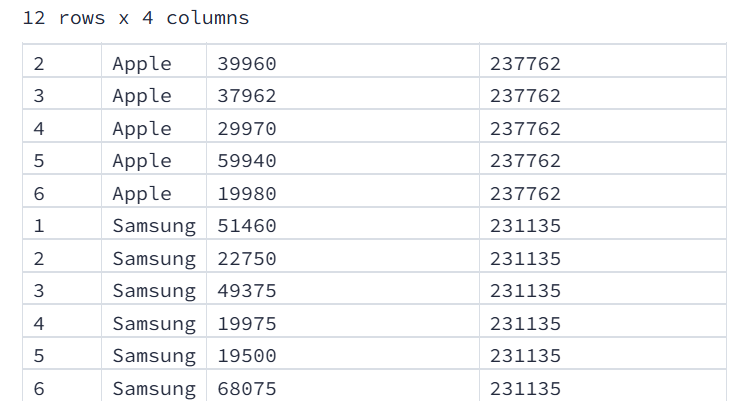